In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pyplot

In [2]:
colab_path = 'ScadaData.txt'
local_path = 'C:\\Users\\hanna\\Desktop\\data\\ScadaData.txt'

scada_data = pd.read_csv(local_path, delimiter='\t',  parse_dates=True)
scada_data['dtTimeStamp'] = pd.to_datetime(scada_data['dtTimeStamp'])
data = scada_data[['dtTimeStamp','WindSpeedMean','WindDirectionMean', 'intObjectId']].groupby('dtTimeStamp').mean()[['WindSpeedMean','WindDirectionMean']][0:2000]
print(data.tail(100))

                     WindSpeedMean  WindDirectionMean
dtTimeStamp                                          
2019-08-14 04:40:00       3.011111         132.811111
2019-08-14 04:50:00       2.996296         134.166667
2019-08-14 05:00:00       2.981481         135.488889
2019-08-14 05:10:00       2.925926         138.229630
2019-08-14 05:20:00       2.692593         140.996296
...                            ...                ...
2019-08-14 20:30:00       4.744444         192.011111
2019-08-14 20:40:00       4.588889         190.214815
2019-08-14 20:50:00       4.725926         189.303704
2019-08-14 21:00:00       5.211111         193.203704
2019-08-14 21:10:00       5.344444         195.440741

[100 rows x 2 columns]


In [3]:
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt

def get_predictions(data, column_name):
    X = data[[column_name]]
    size = int(len(X) * 0.8)
    train, test = X[0:size], X[size:len(X)]
    history = train
    predictions = pd.DataFrame(index=test.index, columns=[column_name])
    for i, row in test.iterrows():
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0].flatten()[0]
        predictions.loc[i][column_name] = yhat
        history.loc[i] = row[column_name]
    
    return predictions


wind_speed_predictions = get_predictions(data, 'WindSpeedMean')
wind_direction_predictions = get_predictions(data, 'WindDirectionMean')

all_predictions = pd.concat([wind_speed_predictions, wind_direction_predictions], axis='index')
print(all_predictions)


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

                    WindSpeedMean WindDirectionMean
dtTimeStamp                                        
2019-08-12 02:40:00        1.9026               NaN
2019-08-12 02:50:00       2.24971               NaN
2019-08-12 03:00:00       2.88403               NaN
2019-08-12 03:10:00       3.18126               NaN
2019-08-12 03:20:00       2.46586               NaN
...                           ...               ...
2019-08-14 20:30:00           NaN           190.723
2019-08-14 20:40:00           NaN           192.281
2019-08-14 20:50:00           NaN           189.993
2019-08-14 21:00:00           NaN           189.218
2019-08-14 21:10:00           NaN           193.859

[800 rows x 2 columns]


In [4]:
all_predictions = pd.concat([wind_speed_predictions, wind_direction_predictions], axis=1)
print(all_predictions)

                    WindSpeedMean WindDirectionMean
dtTimeStamp                                        
2019-08-12 02:40:00        1.9026           213.319
2019-08-12 02:50:00       2.24971           242.764
2019-08-12 03:00:00       2.88403           257.077
2019-08-12 03:10:00       3.18126           281.018
2019-08-12 03:20:00       2.46586           295.831
...                           ...               ...
2019-08-14 20:30:00       5.06187           190.723
2019-08-14 20:40:00       4.67499           192.281
2019-08-14 20:50:00       4.55319           189.993
2019-08-14 21:00:00       4.75884           189.218
2019-08-14 21:10:00       5.32589           193.859

[400 rows x 2 columns]


In [5]:
import os
import sys

new_path = r'C:\Users\hanna\Documents\GitHub\dissertation'
sys.path.append(new_path)

from api.noise_campaign.histogram import Histogram

In [6]:
h = Histogram(3, 12, 1, 12)
wind_speed_bins = h.get_wind_speed_bins()
wind_direction_bins = h.get_wind_direction_bins()

In [7]:
wind_direction_bins

{0.0: [-15.0, 15.0],
 30.0: [15.0, 45.0],
 60.0: [45.0, 75.0],
 90.0: [75.0, 105.0],
 120.0: [105.0, 135.0],
 150.0: [135.0, 165.0],
 180.0: [165.0, 195.0],
 210.0: [195.0, 225.0],
 240.0: [225.0, 255.0],
 270.0: [255.0, 285.0],
 300.0: [285.0, 315.0],
 330.0: [315.0, 345.0]}

In [8]:
import itertools
bins = [list(itertools.chain(*wind_speed_bins.values())), list(itertools.chain(*wind_direction_bins.values()))]

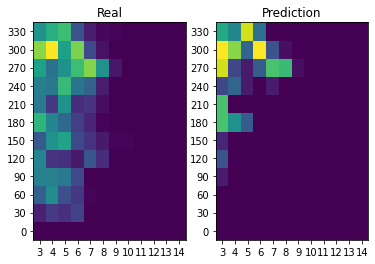

In [9]:
x_raw = data['WindSpeedMean']
y_raw = data['WindDirectionMean']
x_pred = all_predictions['WindSpeedMean']
y_pred = all_predictions['WindDirectionMean']

fig, axes = pyplot.subplots(1, 2)
axes[0].hist2d(x_raw, y_raw, bins=bins)
axes[0].title.set_text('Real')
axes[1].hist2d(x_pred, y_pred, bins=bins)
axes[1].title.set_text('Prediction')

axes[0].set_xticks(list(wind_speed_bins.keys()))
axes[0].set_yticks(list(wind_direction_bins.keys()))

axes[1].set_xticks(list(wind_speed_bins.keys()))
axes[1].set_yticks(list(wind_direction_bins.keys()))
       
pyplot.show()

In [10]:
data["SpeedBin"] = data['WindSpeedMean'].apply(h.get_wind_speed_bin)
data["DirectionBin"] = data['WindDirectionMean'].apply(h.get_wind_direction_bin)

all_predictions["PredictedSpeedBin"] = all_predictions['WindSpeedMean'].apply(h.get_wind_speed_bin)
all_predictions["PredictedDirectionBin"] = all_predictions['WindDirectionMean'].apply(h.get_wind_direction_bin)

In [12]:
comp = pd.DataFrame()

comp['WindSpeedMean'] = data['WindSpeedMean']
comp['WindDirectionMean'] = data['WindDirectionMean']

comp['PredictedWindSpeedMean'] = all_predictions['WindSpeedMean']
comp['PredictedWindDirectionMean'] = all_predictions['WindDirectionMean']

comp['SpeedBin'] = data['SpeedBin']
comp['DirectionBin'] = data['DirectionBin']
comp['PredictedSpeedBin'] = all_predictions["PredictedSpeedBin"] 
comp['PredictedDirectionBin'] = all_predictions["PredictedDirectionBin"] 

comp.dropna(inplace=True)
comp['SpeedBinEqual'] = comp['SpeedBin'] == comp["PredictedSpeedBin"]
comp['DirectionBinEqual'] = comp['DirectionBin'] == comp["PredictedDirectionBin"]

comp.shape

(330, 10)

In [14]:
wrong = comp.query('DirectionBinEqual == False or SpeedBinEqual == False')

error = len(wrong) / len(data) * 100

print(error)

5.800000000000001


In [43]:
import numpy as np
comp['SpeedBinDifference'] = np.absolute(comp['SpeedBin'] - comp["PredictedSpeedBin"])
comp['DirectionBinDifference'] = np.absolute(comp['DirectionBin'] - comp["PredictedDirectionBin"]) / 30

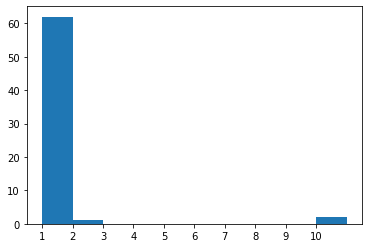

In [38]:
fig, axes = pyplot.subplots()
axes.hist(comp[comp["DirectionBinDifference"] > 0]["DirectionBinDifference"])
axes.set_xticks(list(range(1,11)))
pyplot.show()

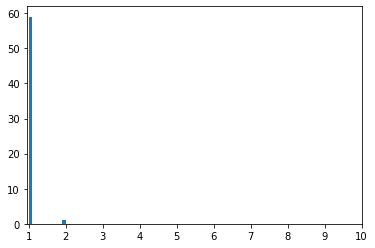

In [42]:
fig, axes = pyplot.subplots()
axes.hist(comp[comp["SpeedBinDifference"] > 0]["SpeedBinDifference"])
axes.set_xticks(list(range(1,11)))
pyplot.show()